In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: M Arshad Zahangir Chowdhury

SVM cross-validations based on pressure and concentrations

"""

%matplotlib inline 

import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from ipywidgets import interactive
import seaborn as sns  #heat map
import glob # batch processing of images

if '../../' not in sys.path:
    sys.path.append('../../')

from src.spectral_datasets.IR_datasets import IR_data


from src.misc.utils import *

import datetime

#import metrics to evaluate classifiers
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



# from sklearn.metrics import roc_curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold


from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier 

from scipy import interpolate
from sys import getsizeof

path_exp = "../../data/IR_Experimental_Data/"

In [3]:
s = IR_data(data_start = 400, data_end = 4000, resolution=1, verbosity = False, cv_type = 'pressure')
s.load_IR_data()
print('Number of Compounds:', s.n_compounds)
print('Number of Spectrum:', s.n_spectrum)
print('Total Number of Spectra:', s.n_spectra)
print("Front trim :", s.front_trim_amount)
print("End trim :", s.end_trim_amount)
print('Data Start Input:',s.data_start)
print('Data End Input:',s.data_end)           
print('Sample Size of training data:', s.samplesize )
print('Rows discarded:', s.n_discard_rows)
print('Resolution (1/cm) = ', s.resolution)

print('\n labels of molecules present \n', s.labels)
print('\n target indices (integers) of molecules present', s.targets)
print('\n frequencies present in the data \n ', s.frequencies)

Front trim : 0.0
End trim : 0.0
Number of Compounds: 34
Number of Spectrum: 10
Total Number of Spectra: 340
Front trim : 0.0
End trim : 0.0
Data Start Input: 400
Data End Input: 4000
Sample Size of training data: 3601
Rows discarded: 0
Resolution (1/cm) =  1.0

 labels of molecules present 
 ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'NO', 'SO2', 'NO2', 'NH3', 'HNO3', 'HF', 'HCl', 'HBr', 'HI', 'OCS', 'H2CO', 'HOCl', 'HCN', 'CH3Cl', 'H2O2', 'C2H2', 'C2H6', 'PH3', 'H2S', 'HCOOH', 'C2H4', 'CH3OH', 'CH3Br', 'CH3CN', 'C4H2', 'HC3N', 'SO3', 'COCl2']

 target indices (integers) of molecules present [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 1

In [8]:
X = s.spectra
y = s.targets
labels = s.labels
n_compounds = s.n_compounds
n_spectrum = s.n_spectrum
n_spectra = s.n_compounds*s.n_spectrum
samplesize = s.samplesize
wavenumbers = s.frequencies
print('shape of features:', X.shape)
print('shape of labels:', y.shape)

shape of features: (340, 3601)
shape of labels: (340,)


## Pressure Cross-validation

In [10]:
#See what is in each fold

#Create Stratified k-fold


totalnumber_folds=10
pd.set_option("display.max_rows", None, "display.max_columns", None)

# train_X.shape
# train_X_df = pd.DataFrame(train_X)

skf = StratifiedKFold(n_splits=totalnumber_folds,random_state=None, shuffle=False)
skf.get_n_splits(X, y)

#print(skf)


#Intialize fold counter before looping through them
foldcounter=0
Fold_number=np.array([])
Fold_Times=np.array([])
Fold_Class_Acc=np.array([])
Fold_Class_Precision=np.array([])
Fold_Class_Recall=np.array([])
Fold_Class_F1=np.array([])



for train_index, test_index in skf.split(X, y):
    foldcounter+=1
    print("Fold number: ", foldcounter)
    print("\n")
    #print("TRAIN:", train_index)
    #print("TEST:", test_index)
    train_index_DF=pd.DataFrame(train_index)
    test_index_DF=pd.DataFrame(test_index)
#     print('TRAIN INDICES')
#     print(train_index_DF)
    print('----\n')
    print('TEST INDICES')
    print(test_index_DF)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    


Fold number:  1


----

TEST INDICES
      0
0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
10  100
11  110
12  120
13  130
14  140
15  150
16  160
17  170
18  180
19  190
20  200
21  210
22  220
23  230
24  240
25  250
26  260
27  270
28  280
29  290
30  300
31  310
32  320
33  330
Fold number:  2


----

TEST INDICES
      0
0     1
1    11
2    21
3    31
4    41
5    51
6    61
7    71
8    81
9    91
10  101
11  111
12  121
13  131
14  141
15  151
16  161
17  171
18  181
19  191
20  201
21  211
22  221
23  231
24  241
25  251
26  261
27  271
28  281
29  291
30  301
31  311
32  321
33  331
Fold number:  3


----

TEST INDICES
      0
0     2
1    12
2    22
3    32
4    42
5    52
6    62
7    72
8    82
9    92
10  102
11  112
12  122
13  132
14  142
15  152
16  162
17  172
18  182
19  192
20  202
21  212
22  222
23  232
24  242
25  252
26  262
27  272
28  282
29  292
30  302
31  312
32  322
33  332
Fold number:  4


----

TEST INDICES
      0
0   

In [11]:
# test_index_DF

Fold  1
Fold  2
Fold  3
Fold  4
Fold  5


/home/reshad812/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold  6
Fold  7


/home/reshad812/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/reshad812/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/reshad812/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold  8
Fold  9
Fold  10


/home/reshad812/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


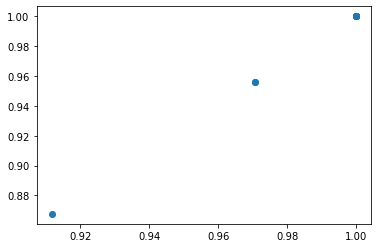

In [12]:
#Stratfied OVR(SVM-Linear)

#Intialize fold counter before looping through them
foldcounter=0
Fold_number=np.array([])
Fold_Times=np.array([])
Fold_Class_Acc=np.array([])
Fold_Class_Precision=np.array([])
Fold_Class_Recall=np.array([])
Fold_Class_F1=np.array([])



for train_index, test_index in skf.split(X, y):
    foldcounter+=1
    #print("TRAIN:", train_index)
    #print("TEST:", test_index)
    train_index_DF=pd.DataFrame(train_index)
    test_index_DF=pd.DataFrame(test_index)
#     print('TRAIN INDICES')
#     print(train_index_DF)
#     print('TEST INDICES')
#     print(test_index_DF)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
           
    #now comes the learning or fitting inside the folds

    print('Fold ', foldcounter)
    
    #OneVsRest (SVM-Linear)

    #Measure time elapsed
    import datetime
    t_start = datetime.datetime.now()

    from sklearn.multiclass import OneVsRestClassifier #Shift + tab will show detains of the classifier
    from sklearn.svm import SVC

    classifier_OVR = OneVsRestClassifier(SVC(kernel='linear',C = 500,decision_function_shape = 'ovo',random_state=1)).fit(X_train, y_train)


    pred_y = classifier_OVR.predict(X_test)

    # Turn on classifier internals to see misclassification indices
    #classifier_internals(pred_y,test_y, train_y, 'OneVsRest')


    cm_OVR = confusion_matrix(y_test, pred_y)
    #print(cm_OVR)
    fig = plt.figure(figsize=(16,10));
#     plt.title('Confusion matrix (P = 0.5-16.5 torr, T=296 K) \n Broad OVR(SVM) molecule-classifier(x=1)\nFold '+str(foldcounter));
    plt.title('OVR(Support Vector Machine-Linear) \nIteration '+str(foldcounter));
    ax = sns.heatmap(cm_OVR,linewidths=2, annot=True, cmap='RdPu');   #cmap='PiYG' also good
    #ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues') #Shows percentage
    ax.set_xticklabels(labels);
    ax.set_yticklabels(labels);
    plt.xlabel('Predicted Molecule');
    plt.ylabel('Actual Moelcule');
    plt.xticks(rotation=90);
    plt.yticks(rotation=0);


    t_end = datetime.datetime.now()
    delta = t_end - t_start
    Time_OVR=delta.total_seconds() * 1000

#     print('Time elaspsed: ', Time_OVR) # milliseconds
    
    
    
    
    plt.savefig('KFOLDFIGURES/CM_OVR_SVM-Linear_P'+ str(foldcounter) + '.png',bbox_inches='tight')
    plt.close()

    

    
    Fold_number=np.append(Fold_number,[foldcounter], axis=0)
    Fold_Times=np.append(Fold_Times,[Time_OVR], axis=0)
    Fold_Class_Acc=np.append(Fold_Class_Acc,[accuracy_score(y_test, pred_y)], axis=0)
    Fold_Class_Precision=np.append(Fold_Class_Precision,[(precision_score(y_test, pred_y, labels=[0],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[1],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[2],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[3],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[4],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[5],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[6],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[7],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[8],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[9],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[10],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[11],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[12],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[13],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[14],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[15],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[16],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[17],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[18],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[19],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[20],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[21],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[22],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[23],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[24],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[25],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[26],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[27],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[28],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[29],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[30],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[31],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[32],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[33],average='micro')
                                                          
                                                          )/n_compounds
                                                        
                                                        ], axis=0)
    Fold_Class_Recall=np.append(Fold_Class_Recall,[(recall_score(y_test, pred_y, labels=[0],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[1],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[2],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[3],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[4],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[5],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[6],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[7],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[8],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[9],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[10],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[11],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[12],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[13],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[14],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[15],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[16],average='micro')                                                    
                                                          + recall_score(y_test, pred_y, labels=[17],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[18],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[19],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[20],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[21],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[22],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[23],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[24],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[25],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[26],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[27],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[28],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[29],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[30],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[31],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[32],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[33],average='micro')
                                                          )/n_compounds
                                                        
                                                        ], axis=0)
    
    Fold_Class_F1=np.append(Fold_Class_F1,[(f1_score(y_test, pred_y, labels=[0],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[1],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[2],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[3],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[4],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[5],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[6],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[7],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[8],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[9],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[10],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[11],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[12],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[13],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[14],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[15],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[16],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[17],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[18],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[19],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[20],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[21],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[22],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[23],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[24],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[25],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[26],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[27],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[28],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[29],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[30],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[31],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[32],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[33],average='micro')
                                                   )/n_compounds
                                                        
                                                        ], axis=0)
    


kfoldResults_OVR_SVM = pd.DataFrame({'Method': 'OVR(SVM-Linear)',
                             'Fold number': Fold_number,
                             'Time': Fold_Times,
                             'Accuracy': Fold_Class_Acc,
                             'Average Precision': Fold_Class_Precision,
                             'Average Recall': Fold_Class_Recall,
                             'Average F1 score': Fold_Class_F1
                            })


plt.scatter(Fold_Class_Recall,Fold_Class_Precision);


In [13]:
#append results from all folds
kfoldResults = pd.DataFrame({})


kfoldResults = kfoldResults.append(kfoldResults_OVR_SVM, ignore_index=True)


# kfoldResults.to_csv('kfoldResults_P' +'.csv', index=False)
kfoldResults

,Method,Fold number,Time,Accuracy,Average Precision,Average Recall,Average F1 score
0,OVR(SVM-Linear),1.0,1131.129,1.000000,1.000000,1.000000,1.000000
1,OVR(SVM-Linear),2.0,1129.948,1.000000,1.000000,1.000000,1.000000
2,OVR(SVM-Linear),3.0,1189.142,1.000000,1.000000,1.000000,1.000000
3,OVR(SVM-Linear),4.0,1012.509,1.000000,1.000000,1.000000,1.000000
4,OVR(SVM-Linear),5.0,1196.052,0.970588,0.955882,0.970588,0.960784
5,OVR(SVM-Linear),6.0,1256.154,1.000000,1.000000,1.000000,1.000000
6,OVR(SVM-Linear),7.0,1022.309,0.911765,0.867647,0.911765,0.882353
7,OVR(SVM-Linear),8.0,1006.546,1.000000,1.000000,1.000000,1.000000
8,OVR(SVM-Linear),9.0,1310.737,1.000000,1.000000,1.000000,1.000000
9,OVR(SVM-Linear),10.0,991.742,0.970588,0.955882,0.970588,0.960784


In [16]:
s = IR_data(data_start = 400, data_end = 4000, resolution=1, verbosity = False, cv_type = 'concentration')
s.load_IR_data()
print('Number of Compounds:', s.n_compounds)
print('Number of Spectrum:', s.n_spectrum)
print('Total Number of Spectra:', s.n_spectra)
print("Front trim :", s.front_trim_amount)
print("End trim :", s.end_trim_amount)
print('Data Start Input:',s.data_start)
print('Data End Input:',s.data_end)           
print('Sample Size of training data:', s.samplesize )
print('Rows discarded:', s.n_discard_rows)
print('Resolution (1/cm) = ', s.resolution)

print('\n labels of molecules present \n', s.labels)
print('\n target indices (integers) of molecules present', s.targets)
print('\n frequencies present in the data \n ', s.frequencies)

Front trim : 0.0
End trim : 0.0
Number of Compounds: 34
Number of Spectrum: 7
Total Number of Spectra: 238
Front trim : 0.0
End trim : 0.0
Data Start Input: 400
Data End Input: 4000
Sample Size of training data: 3601
Rows discarded: 0
Resolution (1/cm) =  1.0

 labels of molecules present 
 ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'NO', 'SO2', 'NO2', 'NH3', 'HNO3', 'HF', 'HCl', 'HBr', 'HI', 'OCS', 'H2CO', 'HOCl', 'HCN', 'CH3Cl', 'H2O2', 'C2H2', 'C2H6', 'PH3', 'H2S', 'HCOOH', 'C2H4', 'CH3OH', 'CH3Br', 'CH3CN', 'C4H2', 'HC3N', 'SO3', 'COCl2']

 target indices (integers) of molecules present [ 0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  7  7  7  7  7  7  7  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10
 10 10 10 10 10 11 11 11 11 11 11 11 12 12 12 12 12 12 12 13 13 13 13 13
 13 13 14 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 17
 17 17 17 17 17 17 18 18 18 18 18 18 18

In [17]:
X = s.spectra
y = s.targets
labels = s.labels
n_compounds = s.n_compounds
n_spectrum = s.n_spectrum
n_spectra = s.n_compounds*s.n_spectrum
samplesize = s.samplesize
wavenumbers = s.frequencies
print('shape of features:', X.shape)
print('shape of labels:', y.shape)

shape of features: (238, 3601)
shape of labels: (238,)


In [19]:
#See what is in each fold

#Create Stratified k-fold


totalnumber_folds=7
pd.set_option("display.max_rows", None, "display.max_columns", None)

# train_X.shape
# train_X_df = pd.DataFrame(train_X)

skf = StratifiedKFold(n_splits=totalnumber_folds,random_state=None, shuffle=False)
skf.get_n_splits(X, y)

#print(skf)


#Intialize fold counter before looping through them
foldcounter=0
Fold_number=np.array([])
Fold_Times=np.array([])
Fold_Class_Acc=np.array([])
Fold_Class_Precision=np.array([])
Fold_Class_Recall=np.array([])
Fold_Class_F1=np.array([])



for train_index, test_index in skf.split(X, y):
    foldcounter+=1
    print("Fold number: ", foldcounter)
    print("\n")
    #print("TRAIN:", train_index)
    #print("TEST:", test_index)
    train_index_DF=pd.DataFrame(train_index)
    test_index_DF=pd.DataFrame(test_index)
#     print('TRAIN INDICES')
#     print(train_index_DF)
    print('----\n')
    print('TEST INDICES')
    print(test_index_DF)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    


Fold number:  1


----

TEST INDICES
      0
0     0
1     7
2    14
3    21
4    28
5    35
6    42
7    49
8    56
9    63
10   70
11   77
12   84
13   91
14   98
15  105
16  112
17  119
18  126
19  133
20  140
21  147
22  154
23  161
24  168
25  175
26  182
27  189
28  196
29  203
30  210
31  217
32  224
33  231
Fold number:  2


----

TEST INDICES
      0
0     1
1     8
2    15
3    22
4    29
5    36
6    43
7    50
8    57
9    64
10   71
11   78
12   85
13   92
14   99
15  106
16  113
17  120
18  127
19  134
20  141
21  148
22  155
23  162
24  169
25  176
26  183
27  190
28  197
29  204
30  211
31  218
32  225
33  232
Fold number:  3


----

TEST INDICES
      0
0     2
1     9
2    16
3    23
4    30
5    37
6    44
7    51
8    58
9    65
10   72
11   79
12   86
13   93
14  100
15  107
16  114
17  121
18  128
19  135
20  142
21  149
22  156
23  163
24  170
25  177
26  184
27  191
28  198
29  205
30  212
31  219
32  226
33  233
Fold number:  4


----

TEST INDICES
      0
0   

Fold  1
Fold  2
Fold  3
Fold  4
Fold  5
Fold  6
Fold  7


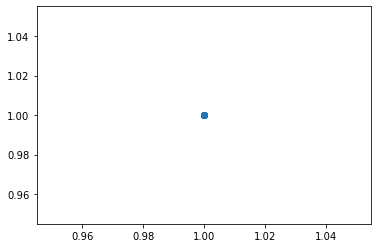

In [20]:
#Stratfied OVR(SVM-Linear)

#Intialize fold counter before looping through them
foldcounter=0
Fold_number=np.array([])
Fold_Times=np.array([])
Fold_Class_Acc=np.array([])
Fold_Class_Precision=np.array([])
Fold_Class_Recall=np.array([])
Fold_Class_F1=np.array([])



for train_index, test_index in skf.split(X, y):
    foldcounter+=1
    #print("TRAIN:", train_index)
    #print("TEST:", test_index)
    train_index_DF=pd.DataFrame(train_index)
    test_index_DF=pd.DataFrame(test_index)
#     print('TRAIN INDICES')
#     print(train_index_DF)
#     print('TEST INDICES')
#     print(test_index_DF)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
           
    #now comes the learning or fitting inside the folds

    print('Fold ', foldcounter)
    
    #OneVsRest (SVM-Linear)

    #Measure time elapsed
    import datetime
    t_start = datetime.datetime.now()

    from sklearn.multiclass import OneVsRestClassifier #Shift + tab will show detains of the classifier
    from sklearn.svm import SVC

    classifier_OVR = OneVsRestClassifier(SVC(kernel='linear',C = 500,decision_function_shape = 'ovo',random_state=1)).fit(X_train, y_train)


    pred_y = classifier_OVR.predict(X_test)

    # Turn on classifier internals to see misclassification indices
    #classifier_internals(pred_y,test_y, train_y, 'OneVsRest')


    cm_OVR = confusion_matrix(y_test, pred_y)
    #print(cm_OVR)
    fig = plt.figure(figsize=(16,10));
#     plt.title('Confusion matrix (P = 0.5-16.5 torr, T=296 K) \n Broad OVR(SVM) molecule-classifier(x=1)\nFold '+str(foldcounter));
    plt.title('OVR(Support Vector Machine-Linear) \nIteration '+str(foldcounter));
    ax = sns.heatmap(cm_OVR,linewidths=2, annot=True, cmap='RdPu');   #cmap='PiYG' also good
    #ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues') #Shows percentage
    ax.set_xticklabels(labels);
    ax.set_yticklabels(labels);
    plt.xlabel('Predicted Molecule');
    plt.ylabel('Actual Moelcule');
    plt.xticks(rotation=90);
    plt.yticks(rotation=0);


    t_end = datetime.datetime.now()
    delta = t_end - t_start
    Time_OVR=delta.total_seconds() * 1000

#     print('Time elaspsed: ', Time_OVR) # milliseconds
    
    
    
    
    plt.savefig('KFOLDFIGURES/CM_OVR_SVM-Linear_X'+ str(foldcounter) + '.png',bbox_inches='tight')
    plt.close()

    

    
    Fold_number=np.append(Fold_number,[foldcounter], axis=0)
    Fold_Times=np.append(Fold_Times,[Time_OVR], axis=0)
    Fold_Class_Acc=np.append(Fold_Class_Acc,[accuracy_score(y_test, pred_y)], axis=0)
    Fold_Class_Precision=np.append(Fold_Class_Precision,[(precision_score(y_test, pred_y, labels=[0],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[1],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[2],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[3],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[4],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[5],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[6],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[7],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[8],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[9],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[10],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[11],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[12],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[13],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[14],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[15],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[16],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[17],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[18],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[19],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[20],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[21],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[22],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[23],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[24],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[25],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[26],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[27],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[28],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[29],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[30],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[31],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[32],average='micro')
                                                          + precision_score(y_test, pred_y, labels=[33],average='micro')
                                                          
                                                          )/n_compounds
                                                        
                                                        ], axis=0)
    Fold_Class_Recall=np.append(Fold_Class_Recall,[(recall_score(y_test, pred_y, labels=[0],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[1],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[2],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[3],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[4],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[5],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[6],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[7],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[8],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[9],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[10],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[11],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[12],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[13],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[14],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[15],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[16],average='micro')                                                    
                                                          + recall_score(y_test, pred_y, labels=[17],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[18],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[19],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[20],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[21],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[22],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[23],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[24],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[25],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[26],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[27],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[28],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[29],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[30],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[31],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[32],average='micro')
                                                          + recall_score(y_test, pred_y, labels=[33],average='micro')
                                                          )/n_compounds
                                                        
                                                        ], axis=0)
    
    Fold_Class_F1=np.append(Fold_Class_F1,[(f1_score(y_test, pred_y, labels=[0],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[1],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[2],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[3],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[4],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[5],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[6],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[7],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[8],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[9],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[10],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[11],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[12],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[13],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[14],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[15],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[16],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[17],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[18],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[19],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[20],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[21],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[22],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[23],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[24],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[25],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[26],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[27],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[28],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[29],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[30],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[31],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[32],average='micro')
                                                          + f1_score(y_test, pred_y, labels=[33],average='micro')
                                                   )/n_compounds
                                                        
                                                        ], axis=0)
    


kfoldResults_OVR_SVM = pd.DataFrame({'Method': 'OVR(SVM-Linear)',
                             'Fold number': Fold_number,
                             'Time': Fold_Times,
                             'Accuracy': Fold_Class_Acc,
                             'Average Precision': Fold_Class_Precision,
                             'Average Recall': Fold_Class_Recall,
                             'Average F1 score': Fold_Class_F1
                            })


plt.scatter(Fold_Class_Recall,Fold_Class_Precision);


In [21]:
#append results from all folds
kfoldResults = pd.DataFrame({})


kfoldResults = kfoldResults.append(kfoldResults_OVR_SVM, ignore_index=True)


# kfoldResults.to_csv('kfoldResults_X' +'.csv', index=False)
kfoldResults

,Method,Fold number,Time,Accuracy,Average Precision,Average Recall,Average F1 score
0,OVR(SVM-Linear),1.0,18847.783,1.0,1.0,1.0,1.0
1,OVR(SVM-Linear),2.0,26506.656,1.0,1.0,1.0,1.0
2,OVR(SVM-Linear),3.0,28632.285,1.0,1.0,1.0,1.0
3,OVR(SVM-Linear),4.0,14566.794,1.0,1.0,1.0,1.0
4,OVR(SVM-Linear),5.0,9784.584,1.0,1.0,1.0,1.0
5,OVR(SVM-Linear),6.0,26945.674,1.0,1.0,1.0,1.0
6,OVR(SVM-Linear),7.0,3167.594,1.0,1.0,1.0,1.0
